[05:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
训练结束


<Figure size 432x288 with 0 Axes>

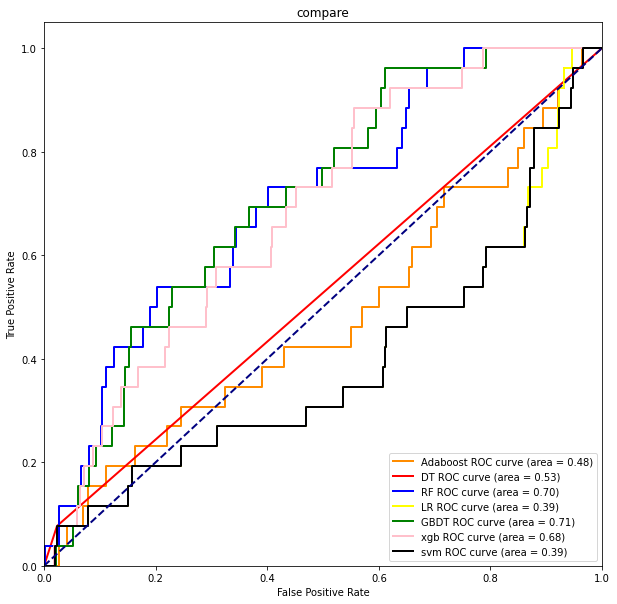

In [131]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

os.getcwd()  # 'C:\\Users\\dell\\zhaoxuan'
os.listdir()  # 列出所有文件

filelist = os.listdir()

csv_list = [x for x in filelist if 'csv' in x]
# print(csv_list)
# print(csv_list[0])

data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0]
X_0 = X_0.append(X_1)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134

sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)

from sklearn.ensemble import RandomForestClassifier  # 随机森林
import lightgbm as lgb # lightgbm
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.tree import DecisionTreeClassifier 
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

clf_adaboost = AdaBoostClassifier(n_estimators=500, random_state=2,learning_rate=0.3)
y_score_adaboost = clf_adaboost.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_adaboost = clf_adaboost.predict(X_te)
# acc_te_adaboost = sum(pre_adaboost == Y_te)/len(pre_adaboost)
# print('adaboost测试集的准确率',acc_te_adaboost)
# print('Accuracy of adaboost Classifier:', clf_adaboost.score(X_te, Y_te))
# print(classification_report(Y_te, pre_adaboost, target_names=['0', '1']))
fpr_adaboost,tpr_adaboost,thresholds_adaboost = metrics.roc_curve(Y_te, y_score_adaboost, pos_label=1)
roc_auc_adaboost = metrics.auc(fpr_adaboost,tpr_adaboost)  # 计算auc的值

clf_RF = RandomForestClassifier(max_depth=4, random_state=2,n_estimators=120)
y_score_RF = clf_RF.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_RF = clf_RF.predict(X_te)
# acc_te_RF = sum(pre_RF == Y_te)/len(pre_RF)
# print('RF测试集的准确率',acc_te_RF)
# print('Accuracy of RF Classifier:', clf_RF.score(X_te, Y_te))
# print(classification_report(Y_te, pre_RF, target_names=['0', '1']))
fpr_RF,tpr_RF,thresholds_RF = metrics.roc_curve(Y_te, y_score_RF, pos_label=1)
roc_auc_RF = metrics.auc(fpr_RF,tpr_RF)  # 计算auc的值

clf_DT = DecisionTreeClassifier(random_state=2)
y_score_DT = clf_DT.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
fpr_DT,tpr_DT,thresholds_DT = metrics.roc_curve(Y_te, y_score_DT, pos_label=1)
roc_auc_DT = metrics.auc(fpr_DT,tpr_DT)  # 计算auc的值
pre_DT = clf_DT.predict(X_te)
# acc_te_DT = sum(pre_DT == Y_te)/len(pre_DT)
# print('DT测试集的准确率',acc_te_DT)
# print('Accuracy of DT Classifier:', clf_DT.score(X_te, Y_te))
# print(classification_report(Y_te, pre_DT, target_names=['0', '1']))

clf_LR = LogisticRegression(random_state=2)
y_score_LR = clf_LR.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_LR = clf_LR.predict(X_te)
# acc_te_LR = sum(pre_LR == Y_te)/len(pre_LR)
# print('LR测试集的准确率',acc_te_logistic)
# print('Accuracy of LR Classifier:', clf_LR.score(X_te, Y_te))
# print(classification_report(Y_te, pre_LR, target_names=['0', '1']))
fpr_LR,tpr_LR,thresholds_LR = metrics.roc_curve(Y_te, y_score_LR, pos_label=1)
roc_auc_LR = metrics.auc(fpr_LR,tpr_LR)  # 计算auc的值


clf_gdbt = GradientBoostingClassifier(random_state=2)
y_score_GBDT = clf_gdbt.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_gdbt = clf_gdbt.predict(X_te)
# acc_te_gdbt = sum(pre_gdbt == Y_te)/len(pre_gdbt)
# print('GBDT测试集的准确率',acc_te_gdbt)
# print('Accuracy of GBDT Classifier:', clf_gdbt.score(X_te, Y_te))
# print(classification_report(Y_te, pre_gdbt, target_names=['0', '1']))
fpr_GBDT,tpr_GBDT,thresholds_GBDT = metrics.roc_curve(Y_te, y_score_GBDT, pos_label=1)
roc_auc_GBDT = metrics.auc(fpr_GBDT,tpr_GBDT)  # 计算auc的值

clf_xgb = XGBClassifier(random_state=2)
y_score_xgb = clf_xgb.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_xgb = clf_xgb.predict(X_te)
# acc_te_xgb = sum(pre_xgb == Y_te)/len(pre_xgb)
# print('xgb测试集的准确率',acc_te_xgb)
# print('Accuracy of xgb Classifier:', clf_xgb.score(X_te, Y_te))
# print(classification_report(Y_te, pre_xgb, target_names=['0', '1']))
fpr_xgb,tpr_xgb,thresholds_xgb = metrics.roc_curve(Y_te, y_score_xgb, pos_label=1)
roc_auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)  # 计算auc的值

clf_svm = SVC(probability=True,random_state=2)
y_score_svm=clf_svm.fit(X_sos,y_sos).predict_proba(X_te)[:,1]
fpr_svm,tpr_svm,thresholds_svm = metrics.roc_curve(Y_te, y_score_svm, pos_label=1)
roc_auc_svm = metrics.auc(fpr_svm,tpr_svm)  # 计算auc的值
print('训练结束')
# lgb_train = lgb.Dataset(X_sos, y_sos)
# lgb_eval = lgb.Dataset(X_te, Y_te, reference=lgb_train)
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',  # 设置提升类型
#     'objective': 'regression',  # 目标函数
#     'metric': {'l2', 'auc'},  # 评估函数
#     'num_leaves': 31,  # 叶子节点数
#     'learning_rate': 0.04,  # 学习速率
#     'feature_fraction': 0.9,  # 建树的特征选择比例
#     'bagging_fraction': 0.8,  # 建树的样本采样比例
#     'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
#     'verbose': -1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
# }
# gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=lgb_eval, early_stopping_rounds=200)
# pre_gbm = gbm.predict(X_te, num_iteration=gbm.best_iteration)
# a = []
# for i in pre_gbm:
#     if i<=0.5:
#         a.append(0)
#     else:
#         a.append(1)
# # acc_te_gbm = sum(a == Y_te)/len(pre_gbm)
# # print('lightgbm的准确率',acc_te_gbm)
# print('Accuracy of lgb Classifier:', gbm.score(X_te, Y_te))
# print(classification_report(Y_te, a, target_names=['0', '1']))




# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))

plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange',lw=lw,label='Adaboost ROC curve (area = %0.2f)' % roc_auc_adaboost)
plt.plot(fpr_DT, tpr_DT, color='red',lw=lw,label='DT ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, color='blue',lw=lw,label='RF ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_LR, tpr_LR, color='yellow',lw=lw,label='LR ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot(fpr_GBDT, tpr_GBDT, color='green',lw=lw,label='GBDT ROC curve (area = %0.2f)' % roc_auc_GBDT)
plt.plot(fpr_xgb, tpr_xgb, color='pink',lw=lw,label='xgb ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_svm, tpr_svm, color='black',lw=lw,label='svm ROC curve (area = %0.2f)' % roc_auc_svm)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('compare')
plt.legend(loc="lower right")
plt.savefig('ROC的对比.png')
plt.show()

['交通运输、仓储和邮政业清洗完成的数据.csv', '住宿和餐饮业清洗完成的数据.csv', '信息传输、软件和信息技术服务业清洗完成的数据.csv', '农、林、牧、渔业清洗完成的数据.csv', '制造业清洗完成的数据.csv', '卫生和社会工作清洗完成的数据.csv', '居民服务、修理和其他服务业清洗完成的数据.csv', '建筑业清洗完成的数据.csv', '房地产业清洗完成的数据.csv', '批发和零售业清洗完成的数据.csv', '教育清洗完成的数据.csv', '文化、体育和娱乐业清洗完成的数据.csv', '水利、环境和公共设施管理业清洗完成的数据.csv', '电力、热力、燃气及水生产和供应业清洗完成的数据.csv', '科学研究和技术服务业清洗完成的数据.csv', '租赁和商务服务业清洗完成的数据.csv', '综合清洗完成的数据.csv', '采矿业清洗完成的数据.csv', '金融业清洗完成的数据.csv']
交通运输、仓储和邮政业清洗完成的数据.csv
Accuracy of adaboost Classifier: 0.9919549477071601
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2468
           1       0.00      0.00      0.00        18

    accuracy                           0.99      2486
   macro avg       0.50      0.50      0.50      2486
weighted avg       0.99      0.99      0.99      2486

Accuracy of RF Classifier: 0.9927594529364441
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2468
           1   

<Figure size 432x288 with 0 Axes>

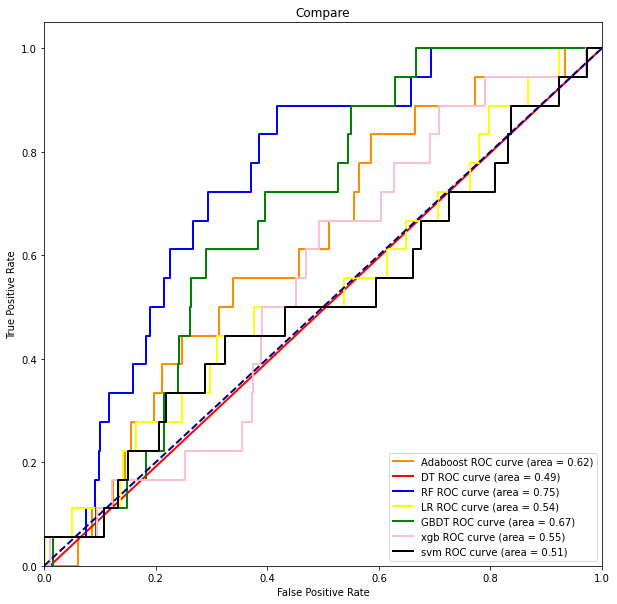

In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

os.getcwd()  # 'C:\\Users\\dell\\zhaoxuan'
os.listdir()  # 列出所有文件

filelist = os.listdir()

csv_list = [x for x in filelist if 'csv' in x]
print(csv_list)
print(csv_list[0])

data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0]
X_0 = X_0.append(X_1)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134

# sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = X_tr, Y_tr

from sklearn.ensemble import RandomForestClassifier  # 随机森林
import lightgbm as lgb # lightgbm
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.tree import DecisionTreeClassifier 
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

clf_adaboost = AdaBoostClassifier(n_estimators=500, random_state=2,learning_rate=0.3)
y_score_adaboost = clf_adaboost.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_adaboost = clf_adaboost.predict(X_te)
# acc_te_adaboost = sum(pre_adaboost == Y_te)/len(pre_adaboost)
# print('adaboost测试集的准确率',acc_te_adaboost)
print('Accuracy of adaboost Classifier:', clf_adaboost.score(X_te, Y_te))
print(classification_report(Y_te, pre_adaboost, target_names=['0', '1']))
fpr_adaboost,tpr_adaboost,thresholds_adaboost = metrics.roc_curve(Y_te, y_score_adaboost, pos_label=1)
roc_auc_adaboost = metrics.auc(fpr_adaboost,tpr_adaboost)  # 计算auc的值

clf_RF = RandomForestClassifier(max_depth=4, random_state=2)
y_score_RF = clf_RF.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_RF = clf_RF.predict(X_te)
# acc_te_RF = sum(pre_RF == Y_te)/len(pre_RF)
# print('RF测试集的准确率',acc_te_RF)
print('Accuracy of RF Classifier:', clf_RF.score(X_te, Y_te))
print(classification_report(Y_te, pre_RF, target_names=['0', '1']))
fpr_RF,tpr_RF,thresholds_RF = metrics.roc_curve(Y_te, y_score_RF, pos_label=1)
roc_auc_RF = metrics.auc(fpr_RF,tpr_RF)  # 计算auc的值

clf_DT = DecisionTreeClassifier(random_state=2)
y_score_DT = clf_DT.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
fpr_DT,tpr_DT,thresholds_DT = metrics.roc_curve(Y_te, y_score_DT, pos_label=1)
roc_auc_DT = metrics.auc(fpr_DT,tpr_DT)  # 计算auc的值
pre_DT = clf_DT.predict(X_te)
# acc_te_DT = sum(pre_DT == Y_te)/len(pre_DT)
# print('DT测试集的准确率',acc_te_DT)
print('Accuracy of DT Classifier:', clf_DT.score(X_te, Y_te))
print(classification_report(Y_te, pre_DT, target_names=['0', '1']))

clf_LR = LogisticRegression(random_state=2)
y_score_LR = clf_LR.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_LR = clf_LR.predict(X_te)
# acc_te_LR = sum(pre_LR == Y_te)/len(pre_LR)
# print('LR测试集的准确率',acc_te_logistic)
print('Accuracy of LR Classifier:', clf_LR.score(X_te, Y_te))
print(classification_report(Y_te, pre_LR, target_names=['0', '1']))
fpr_LR,tpr_LR,thresholds_LR = metrics.roc_curve(Y_te, y_score_LR, pos_label=1)
roc_auc_LR = metrics.auc(fpr_LR,tpr_LR)  # 计算auc的值


clf_gdbt = GradientBoostingClassifier(random_state=2)
y_score_GBDT = clf_gdbt.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_gdbt = clf_gdbt.predict(X_te)
# acc_te_gdbt = sum(pre_gdbt == Y_te)/len(pre_gdbt)
# print('GBDT测试集的准确率',acc_te_gdbt)
print('Accuracy of GBDT Classifier:', clf_gdbt.score(X_te, Y_te))
print(classification_report(Y_te, pre_gdbt, target_names=['0', '1']))
fpr_GBDT,tpr_GBDT,thresholds_GBDT = metrics.roc_curve(Y_te, y_score_GBDT, pos_label=1)
roc_auc_GBDT = metrics.auc(fpr_GBDT,tpr_GBDT)  # 计算auc的值

clf_xgb = XGBClassifier(random_state=2)
y_score_xgb = clf_xgb.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_xgb = clf_xgb.predict(X_te)
# acc_te_xgb = sum(pre_xgb == Y_te)/len(pre_xgb)
# print('xgb测试集的准确率',acc_te_xgb)
print('Accuracy of xgb Classifier:', clf_xgb.score(X_te, Y_te))
print(classification_report(Y_te, pre_xgb, target_names=['0', '1']))
fpr_xgb,tpr_xgb,thresholds_xgb = metrics.roc_curve(Y_te, y_score_xgb, pos_label=1)
roc_auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)  # 计算auc的值

clf_svm = SVC(probability=True,random_state=2)
y_score_svm=clf_svm.fit(X_sos,y_sos).predict_proba(X_te)[:,1]
fpr_svm,tpr_svm,thresholds_svm = metrics.roc_curve(Y_te, y_score_svm, pos_label=1)
roc_auc_svm = metrics.auc(fpr_svm,tpr_svm)  # 计算auc的值
print('训练结束')
# lgb_train = lgb.Dataset(X_sos, y_sos)
# lgb_eval = lgb.Dataset(X_te, Y_te, reference=lgb_train)
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',  # 设置提升类型
#     'objective': 'regression',  # 目标函数
#     'metric': {'l2', 'auc'},  # 评估函数
#     'num_leaves': 31,  # 叶子节点数
#     'learning_rate': 0.04,  # 学习速率
#     'feature_fraction': 0.9,  # 建树的特征选择比例
#     'bagging_fraction': 0.8,  # 建树的样本采样比例
#     'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
#     'verbose': -1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
# }
# gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=lgb_eval, early_stopping_rounds=200)
# pre_gbm = gbm.predict(X_te, num_iteration=gbm.best_iteration)
# a = []
# for i in pre_gbm:
#     if i<=0.5:
#         a.append(0)
#     else:
#         a.append(1)
# # acc_te_gbm = sum(a == Y_te)/len(pre_gbm)
# # print('lightgbm的准确率',acc_te_gbm)
# print('Accuracy of lgb Classifier:', gbm.score(X_te, Y_te))
# print(classification_report(Y_te, a, target_names=['0', '1']))




# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))

plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange',lw=lw,label='Adaboost ROC curve (area = %0.2f)' % roc_auc_adaboost)
plt.plot(fpr_DT, tpr_DT, color='red',lw=lw,label='DT ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, color='blue',lw=lw,label='RF ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_LR, tpr_LR, color='yellow',lw=lw,label='LR ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot(fpr_GBDT, tpr_GBDT, color='green',lw=lw,label='GBDT ROC curve (area = %0.2f)' % roc_auc_GBDT)
plt.plot(fpr_xgb, tpr_xgb, color='pink',lw=lw,label='xgb ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_svm, tpr_svm, color='black',lw=lw,label='svm ROC curve (area = %0.2f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Compare')
plt.legend(loc="lower right")
plt.savefig('ROC对比2.png')
plt.show()